# Split, Merge and Geometric Transforms

In [34]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Read an image
image = cv2.imread('../datasets/mountain.jpg')

### Splitting and merging channels in OpenCV

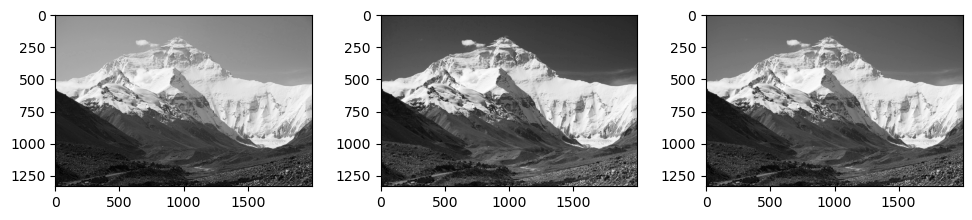

In [36]:
# time consuming application
b, g, r = cv2.split(image)

plt.figure(figsize=(10,6))
for i, n in enumerate([b,r,g]):
    plt.subplot(1,3,i + 1)
    plt.imshow(n, cmap='gray')
plt.tight_layout(pad=1.7)

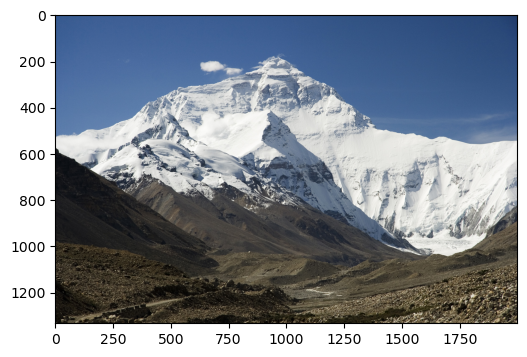

In [37]:
image_copy = cv2.merge((r, g, b))

plt.figure(figsize=(8,4))
plt.imshow(image_copy)

### Scaling an image

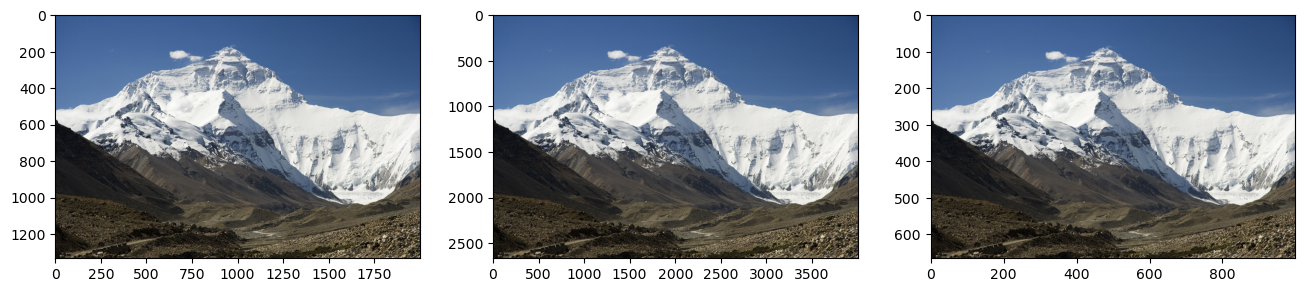

In [38]:
height, width, channels = image_copy.shape

image_resized_1 = cv2.resize(image_copy, (width * 2, height * 2), interpolation=cv2.INTER_CUBIC)
image_resized_2 = cv2.resize(image_copy, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

plt.figure(figsize=(16,12))

plt.subplot(1,3,1)
plt.imshow(image_copy)

plt.subplot(1,3,2)
plt.imshow(image_resized_1)

plt.subplot(1,3,3)
plt.imshow(image_resized_2)

### Translating an image

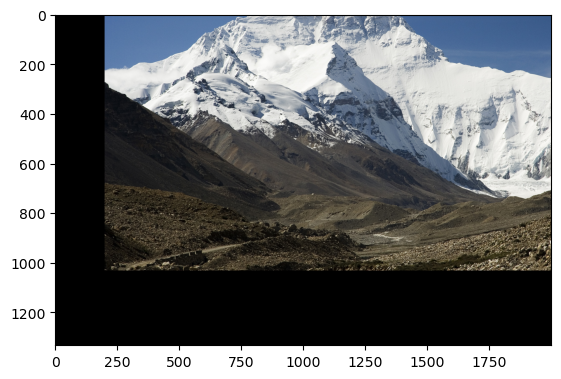

In [39]:
height, width, channels = image_copy.shape

x = 200
y = -300

M = np.float32([[1, 0, x], [0, 1, y]])

image_translated = cv2.warpAffine(image_copy, M, (width, height))

plt.imshow(image_translated)

### Rotating an image

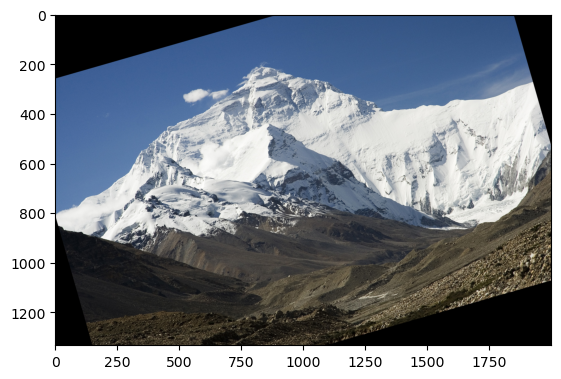

In [54]:
height, width, channels = image_copy.shape

M = cv2.getRotationMatrix2D((width / 2.0, height / 2.0), random.randint(0, 180), 1)
image_rotated = cv2.warpAffine(image_copy, M, (width, height))

plt.imshow(image_rotated)

### Affine transformation of an image

<img src="..\documents\affine.png" width="450"/>

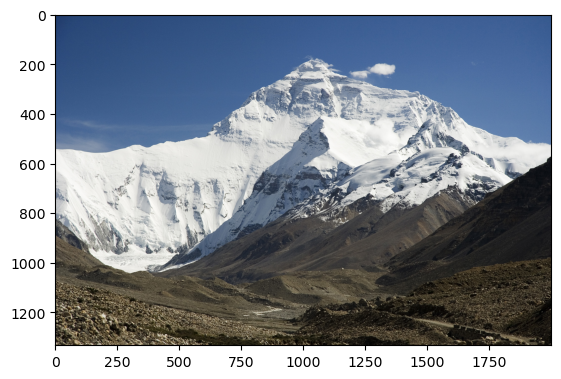

In [65]:
height, width, channels = image_copy.shape

pts_1 = np.float32([[0, 0], [width - 1, 0], [0, height - 1]])
pts_2 = np.float32([[width - 1, 0], [0, 0], [width - 1, height - 1]])

M = cv2.getAffineTransform(pts_1, pts_2)
image_transformed = cv2.warpAffine(image_copy, M, (width, height))

plt.imshow(image_transformed)

### Perspective transformation of an image

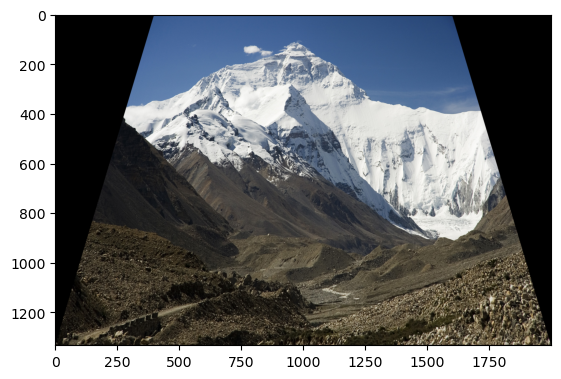

In [77]:
height, width, channels = image_copy.shape

pts_1 = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
pts_2 = np.float32([[width / 5, 0], [width - (width / 5), 0], [0, height], [width, height]])

M = cv2.getPerspectiveTransform(pts_1, pts_2)

image_perspective = cv2.warpPerspective(image_copy, M, (width, height))

plt.imshow(image_perspective)